# GEOMETRIC TRANSFORMATIONS OF IMAGES

# Transformations

OpenCV provides two transformation functions, **cv2.warpAffine** and **cv2.warpPerspective**, with which you can have all kinds of transformations. **cv2.warpAffine** takes a 2x3 transformation matrix while **cv2.warpPerspective** takes a 3x3 transformation matrix as input.

## Scaling

Scaling is just resizing of the image. OpenCV comes with a function **cv2.resize()** for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are **cv2.INTER_AREA** for shrinking and **cv2.INTER_CUBIC** (slow) & **cv2.INTER_LINEAR** for zooming. By default, interpolation method used is **cv2.INTER_LINEAR** for all resizing purposes.

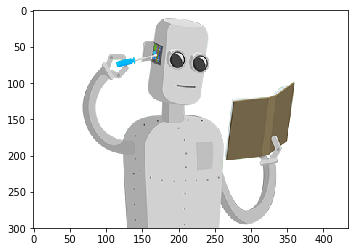

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('robo.png')
plt.imshow(img)

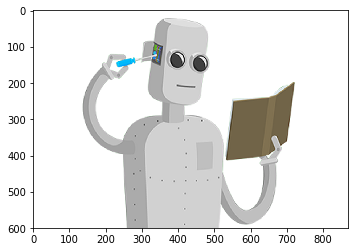

In [3]:
res = cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
plt.imshow(res)

OR

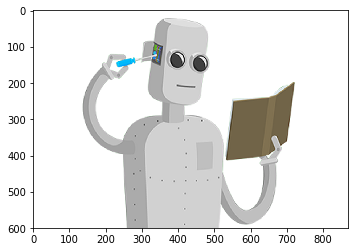

In [4]:
height, width = img.shape[:2]
res = cv2.resize(img,(2*width,2*height),interpolation=cv2.INTER_CUBIC)
plt.imshow(res)

## Translation

Translation is the shifting of object’s location. If you know the shift in (x,y) direction, let it be (t_x,t_y), you can create the transformation matrix **M** as follows:
\begin{equation*}
M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y  \end{bmatrix}
\end{equation*}
You can take make it into a Numpy array of type ```np.float32``` and pass it into **cv2.warpAffine()** function. See below example for a shift of (100,50):

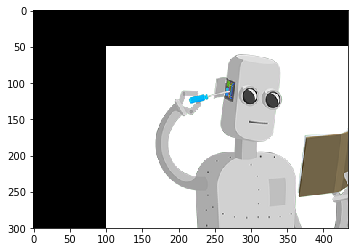

In [6]:
img = cv2.imread('robo.png')
rows,cols,_ = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst)

## Rotation

Rotation of an image for an angle \theta is achieved by the transformation matrix of the form

\begin{equation*}M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta   \end{bmatrix} \end{equation*}

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by

\begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot center.x -  \beta \cdot center.y \\ - \beta &  \alpha &  \beta \cdot center.x + (1- \alpha )  \cdot center.y \end{bmatrix}

where:

\begin{array}{l} \alpha =  scale \cdot \cos \theta , \\ \beta =  scale \cdot \sin \theta \end{array}

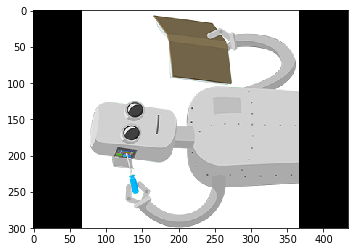

In [7]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst)

## Affine Transformation

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then **cv2.getAffineTransform** will create a 2x3 matrix which is to be passed to **cv2.warpAffine**.

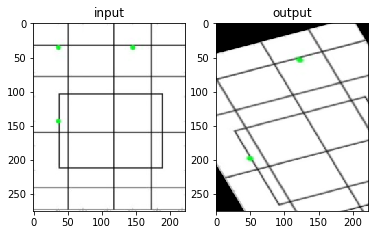

In [9]:
img = cv2.imread('drawing.png')
rows,cols,_ = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121), plt.imshow(img), plt.title('input')
plt.subplot(122), plt.imshow(dst), plt.title('output')
plt.show()

## Perspective Transformation

For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function **cv2.getPerspectiveTransform**. Then apply **cv2.warpPerspective** with this 3x3 transformation matrix.

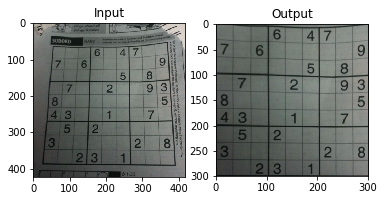

In [11]:
img = cv2.imread('sudokusmall.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()